<a href="https://colab.research.google.com/github/siveshb1/Machine-Learning-Projects/blob/main/End_to_end_heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting heart disease using machine learning

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Statement
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data







## Preparing Tools
Import all the tools

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want plot to appear inside the notebook
%matplotlib inline

#Models from Scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluations (Classification)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart-disease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## EDA

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

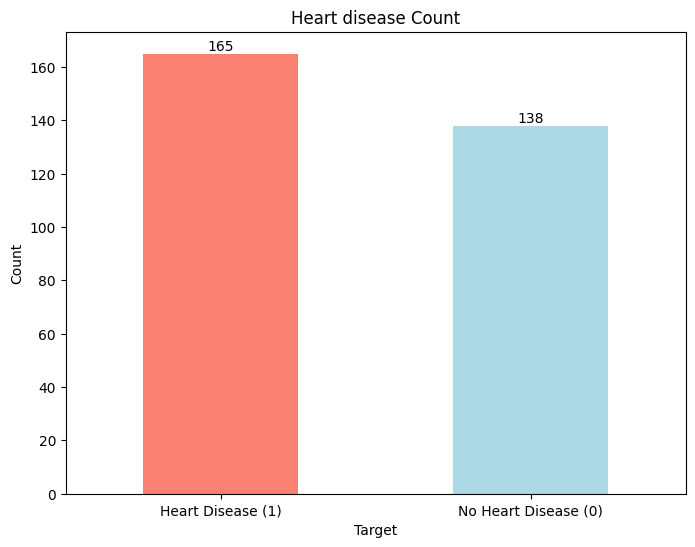

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
value_counts = df['target'].value_counts()

plt.figure(figsize=(8, 6))  # Adjust figure size if necessary

# Plotting the bar chart
value_counts.plot(kind='bar', color=['salmon', 'lightblue'])

# Adding count details on top of each bar
for i, count in enumerate(value_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Modifying x-axis ticks to label 1 as "Heart Disease" and 0 as "No Heart Disease"
tick_labels = ["Heart Disease (1)", "No Heart Disease (0)"]
plt.xticks(range(len(value_counts)), tick_labels, rotation=0)

plt.title('Heart disease Count')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


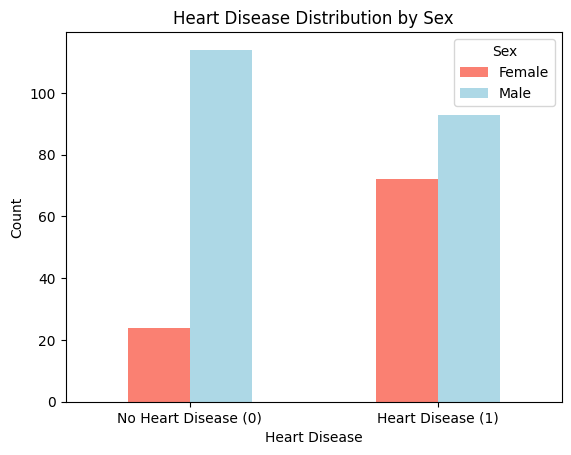

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
cross_tab = pd.crosstab(df.target, df.sex)

# Plotting the cross-tabulated data as a bar chart
ax = cross_tab.plot(kind='bar', color=['salmon', 'lightblue'])

# Adding title
plt.title('Heart Disease Distribution by Sex')

# Adding legend
plt.legend(title='Sex', labels=['Female', 'Male'])

# Adding labels to x and y axes
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Modifying x-axis tick labels
tick_labels = ["No Heart Disease (0)", "Heart Disease (1)"]
plt.xticks(range(len(cross_tab.index)), tick_labels, rotation=0)

plt.show()

In [ ]:
df.head()

In [ ]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

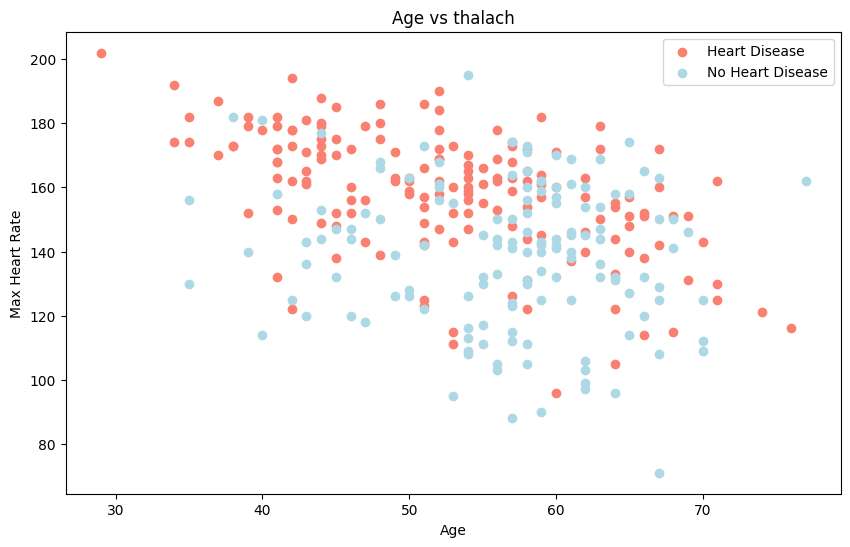

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(df['age'][df['target']==1], df['thalach'][df['target']==1],c='salmon')
plt.scatter(df['age'][df['target']==0], df['thalach'][df['target']==0],c='lightblue')
plt.title('Age vs thalach')
plt.legend(labels=['Heart Disease', 'No Heart Disease'])
plt.xlabel('Age')
plt.ylabel('Max Heart Rate');

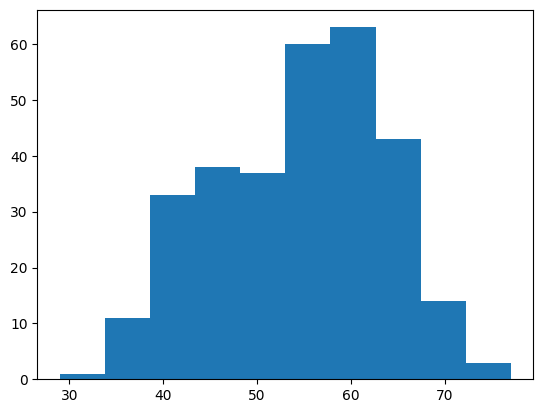

In [ ]:
df['age'].hist(grid=False);

In [ ]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


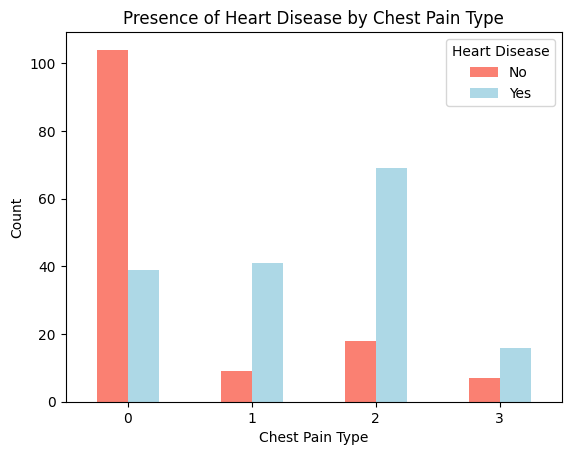

In [ ]:

cross_tab = pd.crosstab(df['cp'], df['target'])


cross_tab.plot(kind='bar', color=['salmon', 'lightblue'])

plt.title('Presence of Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

plt.xticks(rotation=0)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

plt.show()


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


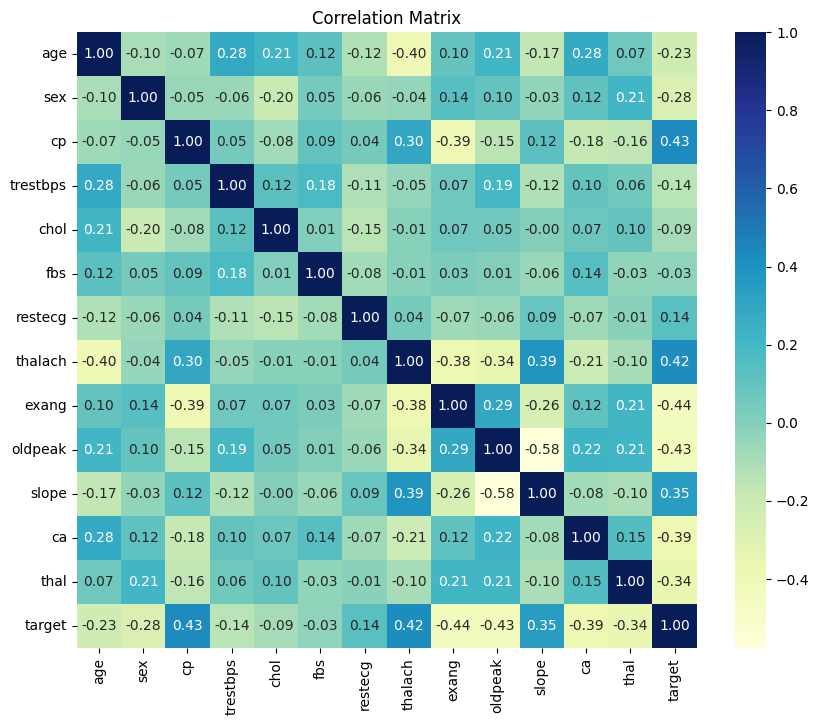

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = df.drop('target',axis = 1)
y = df['target']

In [ ]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def try_models(X_train, X_test, y_train, y_test):

    models = [LogisticRegression(max_iter=1000), RandomForestClassifier(), KNeighborsClassifier()]
    model_names = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors']

    results = {}

    for model, name in zip(models, model_names):
        model.fit(X_train, y_train)
        # y_pred = model.predict(X_test)
        accuracy = model.score(X_test,y_test)
        results[name] = accuracy

    return results


In [ ]:
np.random.seed(0)
results = try_models(X_train, X_test, y_train, y_test)
print(results)


{'Logistic Regression': 0.8524590163934426, 'Random Forest': 0.8852459016393442, 'K-Nearest Neighbors': 0.639344262295082}


In [ ]:
model_compare = pd.DataFrame(results,index=['accuracy'])
model_compare.T

,accuracy
Logistic Regression,0.852459
Random Forest,0.885246
K-Nearest Neighbors,0.639344


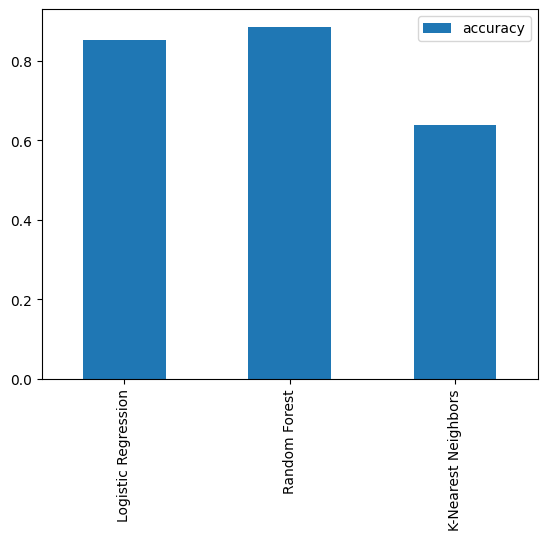

In [ ]:
model_compare.T.plot(kind='bar');

In [ ]:
k_values = range(1,21)

accuracy_train_score = {}
accuracy_test_scores = {}
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  accuracy_train_score[k] = knn.score(X_train,y_train)
  accuracy_test_scores[k] = knn.score(X_test,y_test)

In [ ]:
k_compare_train = pd.DataFrame(accuracy_train_score, index = ['k for Train'] )
k_compare_test = pd.DataFrame(accuracy_test_scores, index = ['k for Test'] )
df_appended = pd.concat([k_compare_train, k_compare_test]).T
df_appended.columns = ['k : Train Accuracy', 'k : Test Accuracy']
df_appended

,k : Train Accuracy,k : Test Accuracy
1,1.000000,0.524590
2,0.797521,0.606557
3,0.780992,0.639344
4,0.760331,0.639344
5,0.780992,0.639344
6,0.743802,0.655738
7,0.723140,0.672131
8,0.719008,0.688525
9,0.731405,0.672131
10,0.727273,0.655738


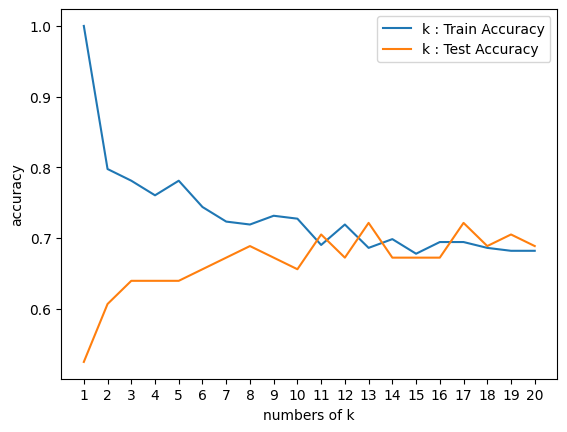

In [ ]:
df_appended.plot(kind='line')
plt.xlabel('numbers of k')
plt.ylabel('accuracy')
plt.xticks(range(1,21));

In [ ]:
#GridSearchCV_Logistics

np.random.seed(1)

logistic_param = {
    'C': np.logspace(-4,4,20),
    'solver' : ['liblinear']
}


random_search = RandomizedSearchCV(estimator=LogisticRegression(),
                                   param_distributions=logistic_param,
                                   n_iter=20,
                                   cv=5,
                                   verbose = True)


random_search.fit(X_train, y_train)


best_params = random_search.best_params_
print("Best parameters:", best_params)


best_model = random_search.best_estimator_

best_model_score = best_model.score(X_test, y_test)
print("Best model accuracy:", best_model_score)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'solver': 'liblinear', 'C': 1.623776739188721}
Best model accuracy: 0.8524590163934426


In [ ]:
#GridSearchCV_RandomForest

np.random.seed(1)

forest_param = {'n_estimators' : np.arange(10,1000,50),
                  'max_depth' : [None, 3 ,5 , 10],
                  'min_samples_split': np.arange(2,20,2),
                  'min_samples_leaf': np.arange(1,20,2)
}


random_search1 = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                    param_distributions= forest_param,
                                    n_iter = 20,
                                    cv = 5,
                                    verbose = True)


random_search1.fit(X_train, y_train)


best_params = random_search1.best_params_
print("Best parameters:", best_params)


best_model = random_search1.best_estimator_

best_model_score = best_model.score(X_test, y_test)
print("Best model accuracy:", best_model_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 760, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': None}
Best model accuracy: 0.8524590163934426


In [ ]:
from sklearn.model_selection import GridSearchCV
np.random.seed(1)


logistic_param = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}


grid_search = GridSearchCV(estimator=LogisticRegression(),
                           param_grid=logistic_param,
                           cv=5,
                           verbose=True)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_model = grid_search.best_estimator_


best_model_score = best_model.score(X_test, y_test)
print("Best model accuracy:", best_model_score)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'C': 1.623776739188721, 'penalty': 'l2', 'solver': 'liblinear'}
Best model accuracy: 0.8524590163934426


In [ ]:
y_preds = best_model.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

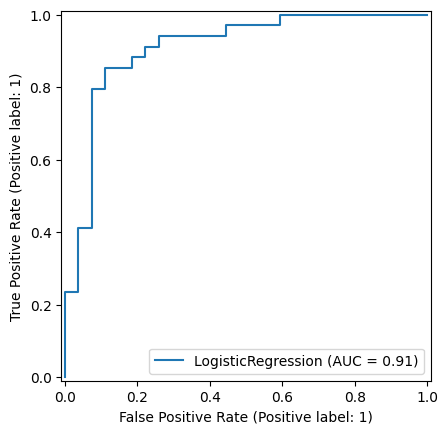

In [ ]:
from sklearn.metrics import RocCurveDisplay

roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test)


In [ ]:
confusion_matrix(y_test,y_preds)

array([[22,  5],
       [ 4, 30]])

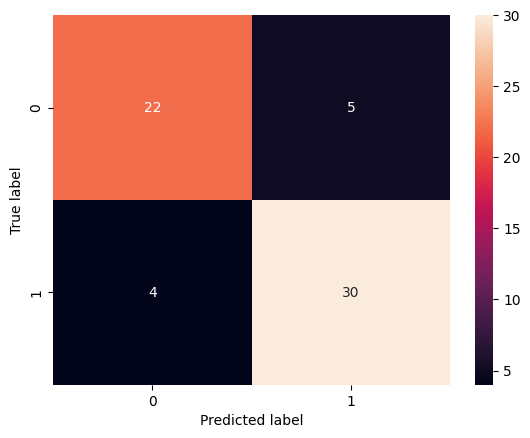

In [ ]:
def plot_conf_mat(y_test,y_preds):
  fig, ax = plt.subplots()
  ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar = True)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')

plot_conf_mat(y_test,y_preds)

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
cv_acc = cross_val_score(best_model,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc.mean()

0.8182513661202186

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model_with_cv(model, X, y, metrics=['accuracy', 'precision', 'recall', 'f1']):

    evaluation_results = {}

    for metric in metrics:
        if metric == 'accuracy':
            scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        elif metric == 'precision':
            scores = cross_val_score(model, X, y, cv=5, scoring='precision')
        elif metric == 'recall':
            scores = cross_val_score(model, X, y, cv=5, scoring='recall')
        elif metric == 'f1':
            scores = cross_val_score(model, X, y, cv=5, scoring='f1')
        else:
            raise ValueError(f"Invalid metric '{metric}'.")

        evaluation_results[metric] = scores.mean()

    return evaluation_results




In [ ]:

evaluation_results = evaluate_model_with_cv(best_model, X, y)
print("Evaluation results:", evaluation_results)

Evaluation results: {'accuracy': 0.8182513661202186, 'precision': 0.8122549019607843, 'recall': 0.8727272727272727, 'f1': 0.8404818247075424}


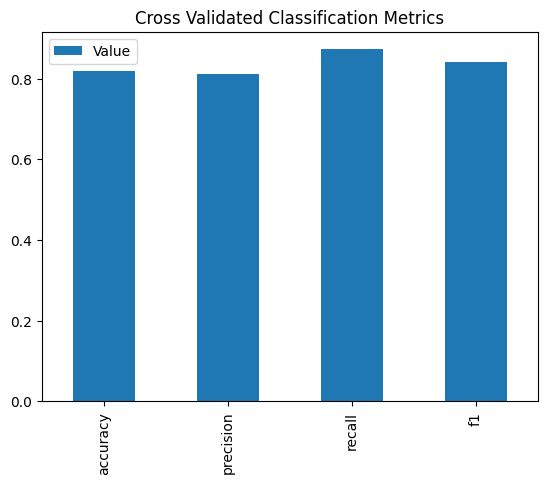

In [ ]:
cros_val_compare = pd.DataFrame(evaluation_results,index=['Value'])
cros_val_compare.T.plot(kind='bar')
plt.title('Cross Validated Classification Metrics');

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
best_model.coef_

array([[ 0.00661335, -1.6215002 ,  0.76173183, -0.00849029, -0.00404457,
        -0.35454344,  0.23329045,  0.02939811, -0.87303884, -0.54104549,
         0.21739624, -0.871287  , -0.69963818]])

In [ ]:
feature_dict = dict(zip(df.columns, best_model.coef_[0]))
feature_dict

{'age': 0.006613348562865086,
 'sex': -1.6215001965072222,
 'cp': 0.7617318279843823,
 'trestbps': -0.008490290067463548,
 'chol': -0.004044565750952494,
 'fbs': -0.3545434351129537,
 'restecg': 0.23329045303693782,
 'thalach': 0.029398109041585685,
 'exang': -0.8730388373945321,
 'oldpeak': -0.5410454911174514,
 'slope': 0.21739623701281796,
 'ca': -0.8712869985085555,
 'thal': -0.6996381756992869}